# Analysis of Blood Pressure Abnormality

# Introduction
<br>
**We have a data which we have state the patient have blood pressure issue or not according to features <br>
**here we use classification algorithms <br>

## Import packages

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## setting row and column

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Data 

In [3]:
bp=pd.read_csv(r"C:\Cloud\Blood_pressure\Patient_with_abnormal_bloodpressure.csv")


In [4]:
bp.head(20)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,6,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,8,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,9,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,10,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [5]:
bp.shape

(2000, 15)

##  Missing Data Analysis 
# Visualize null count in overall dataframe

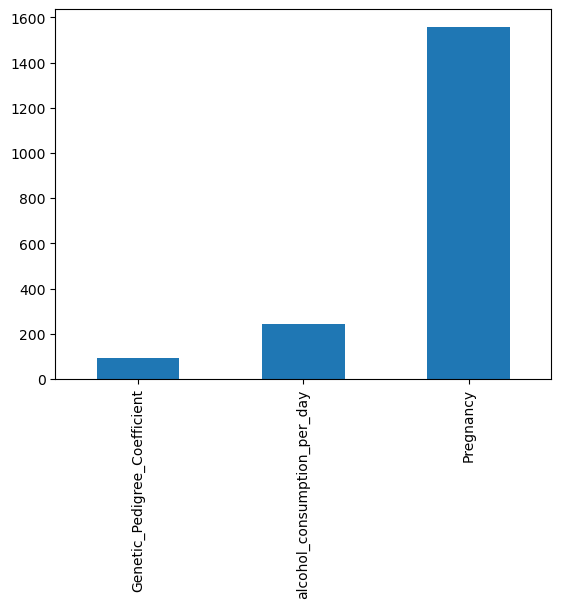

In [6]:

null_in_data = bp.isnull().sum()

null_in_data = null_in_data[null_in_data > 0]

null_in_data.sort_values(inplace=True)

null_in_data.plot.bar()
plt.show()


In [7]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

# Data Mining
drop Patient_Number

In [8]:
bp=bp.drop(columns=["Patient_Number"])

In [9]:
bp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    1758 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

In [10]:
bp.Genetic_Pedigree_Coefficient.value_counts()

0.86    32
0.13    30
0.63    28
0.56    27
0.17    27
0.99    26
0.95    25
0.06    25
0.25    25
0.46    25
0.02    24
0.39    24
0.80    24
0.61    24
0.41    23
0.12    23
0.04    23
0.01    23
0.69    23
0.72    23
0.76    22
0.52    22
0.45    22
0.55    22
0.71    22
0.92    21
0.51    21
0.14    21
0.09    21
0.75    21
0.10    21
0.79    21
0.08    21
0.44    21
0.34    20
0.49    20
0.42    20
0.57    20
0.54    20
0.82    20
0.35    20
0.26    19
0.59    19
0.62    19
0.33    19
0.20    19
0.19    19
0.18    19
0.24    19
0.47    19
0.98    19
0.43    19
0.58    19
0.31    18
0.66    18
0.11    18
0.21    18
0.94    18
1.00    18
0.90    18
0.37    18
0.83    18
0.97    18
0.70    18
0.68    18
0.30    18
0.85    17
0.87    17
0.38    17
0.32    17
0.00    17
0.03    17
0.64    17
0.74    16
0.36    16
0.22    16
0.29    16
0.84    16
0.40    16
0.73    16
0.77    15
0.48    15
0.23    15
0.96    15
0.50    15
0.28    15
0.60    15
0.05    15
0.27    14
0.89    14
0.67    13

In [11]:
bp.Genetic_Pedigree_Coefficient=bp.Genetic_Pedigree_Coefficient.fillna(0)

In [12]:
bp.Pregnancy=bp.Pregnancy.fillna(0)

In [13]:
bp.alcohol_consumption_per_day=bp.alcohol_consumption_per_day.fillna(0)

In [14]:
bp.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [15]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      2000 non-null   float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    2000 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

# Plots to study trends
**Numerical variables**

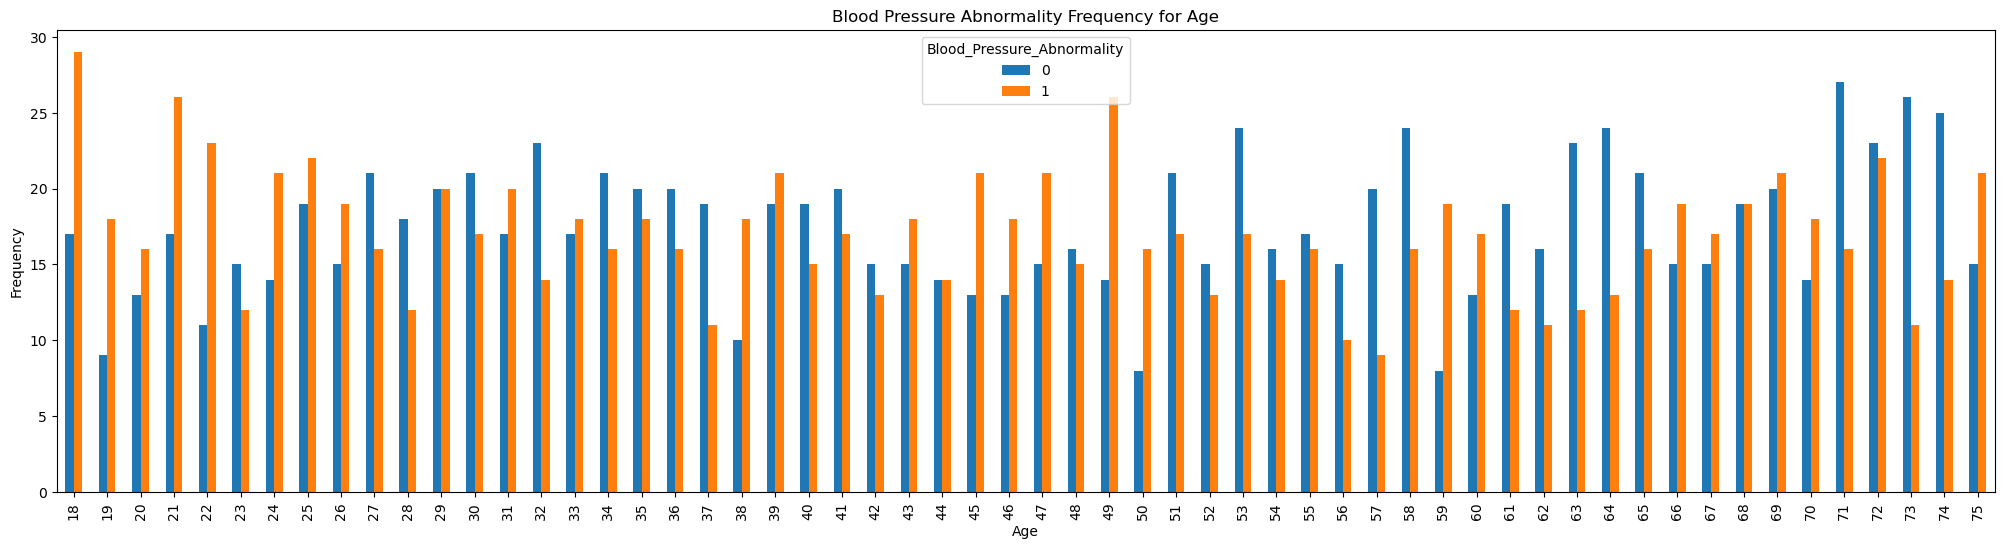

In [16]:
pd.crosstab(bp.Age,bp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(25,6))
plt.title('Blood Pressure Abnormality Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Above figure gives the reprsentation for "Blood_Pressure_Abnormality" against "Age"**

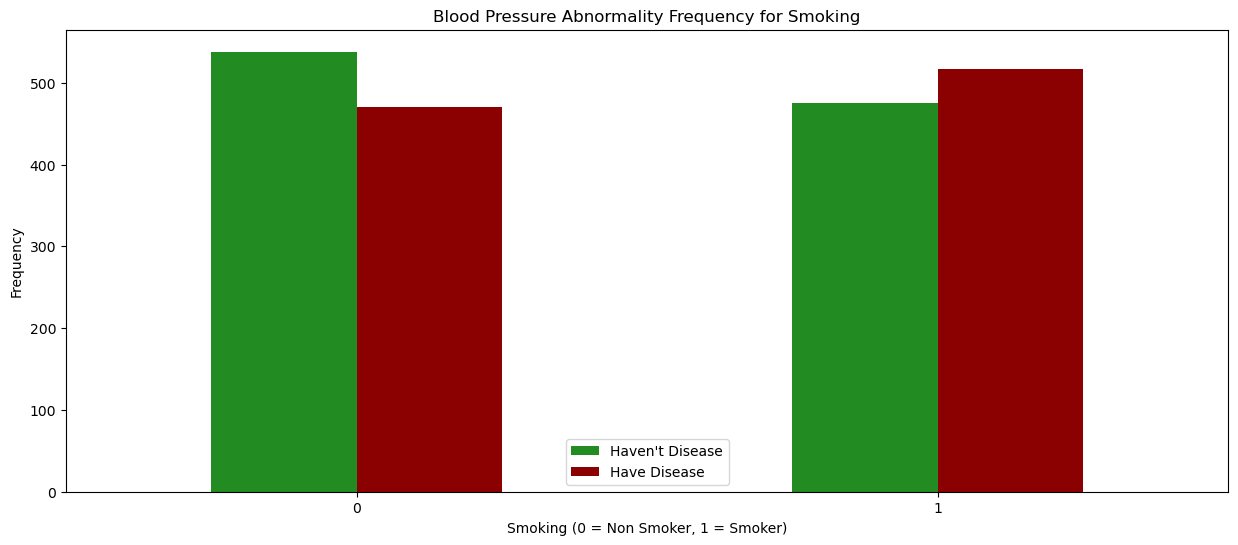

In [17]:
pd.crosstab(bp.Sex,bp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(15,6),color=['forestgreen','darkred' ])
plt.title('Blood Pressure Abnormality Frequency for Smoking')
plt.xlabel('Smoking (0 = Non Smoker, 1 = Smoker)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()



**Above figure gives the reprsentation for Blood_Pressure_Abnormality against Smoking**

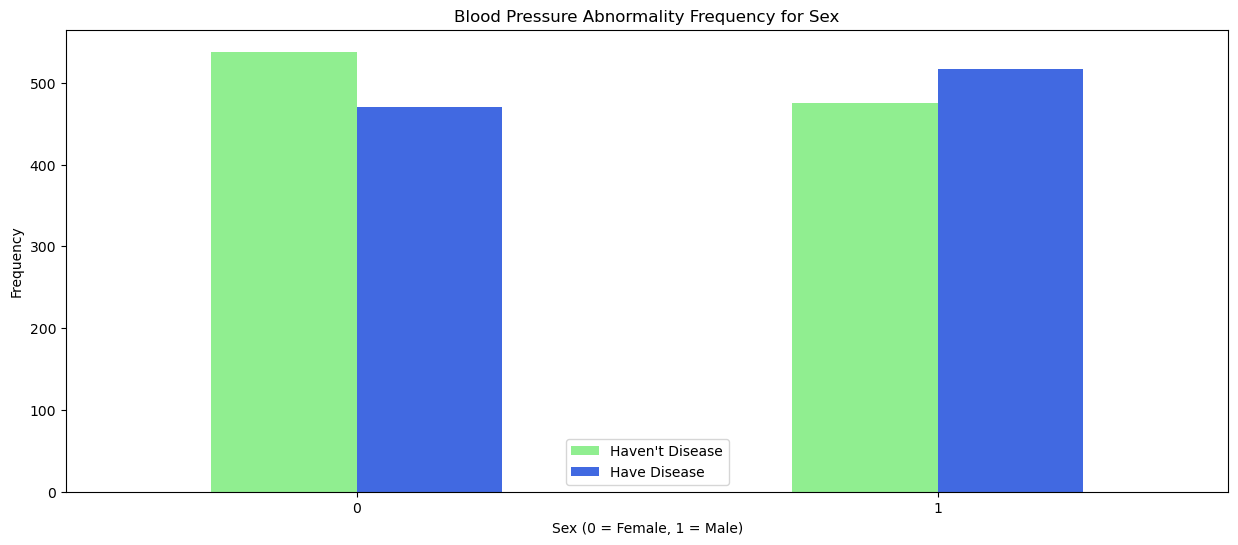

In [18]:
pd.crosstab(bp.Sex,bp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(15,6),color=['lightgreen','royalblue' ])
plt.title('Blood Pressure Abnormality Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Above figure gives the reprsentation for Blood_Pressure_Abnormality against Sex**

## Barplots for various categorical variable to check the effect on Target variable

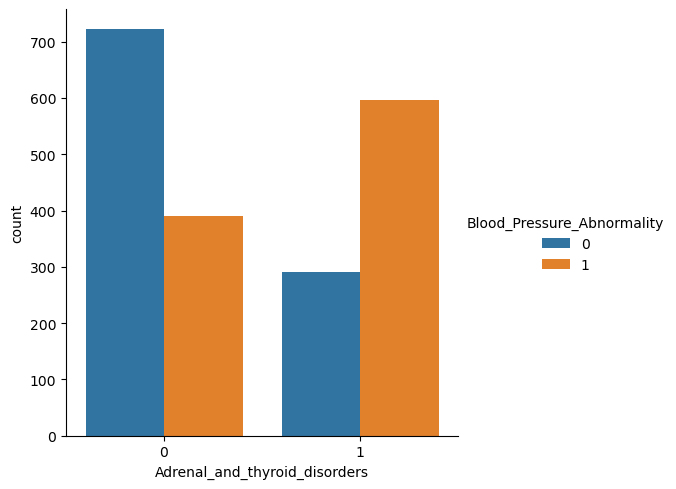

In [19]:
sns.catplot(x="Adrenal_and_thyroid_disorders", kind="count", hue="Blood_Pressure_Abnormality", data=bp)
plt.show()

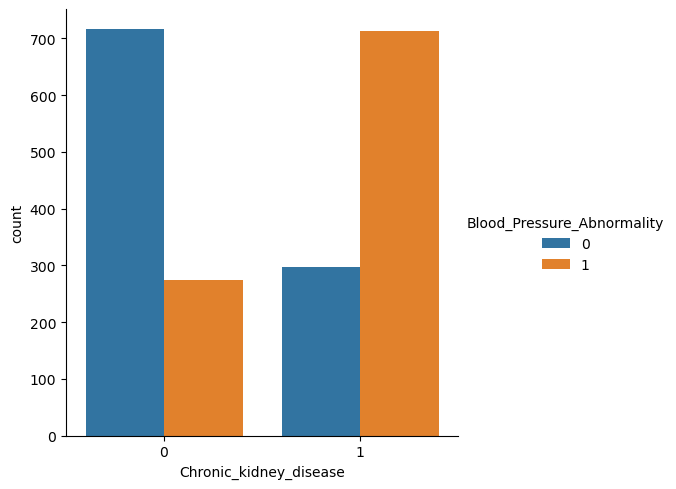

In [20]:

sns.catplot(x="Chronic_kidney_disease", kind="count", hue="Blood_Pressure_Abnormality", data=bp)


## correlation 

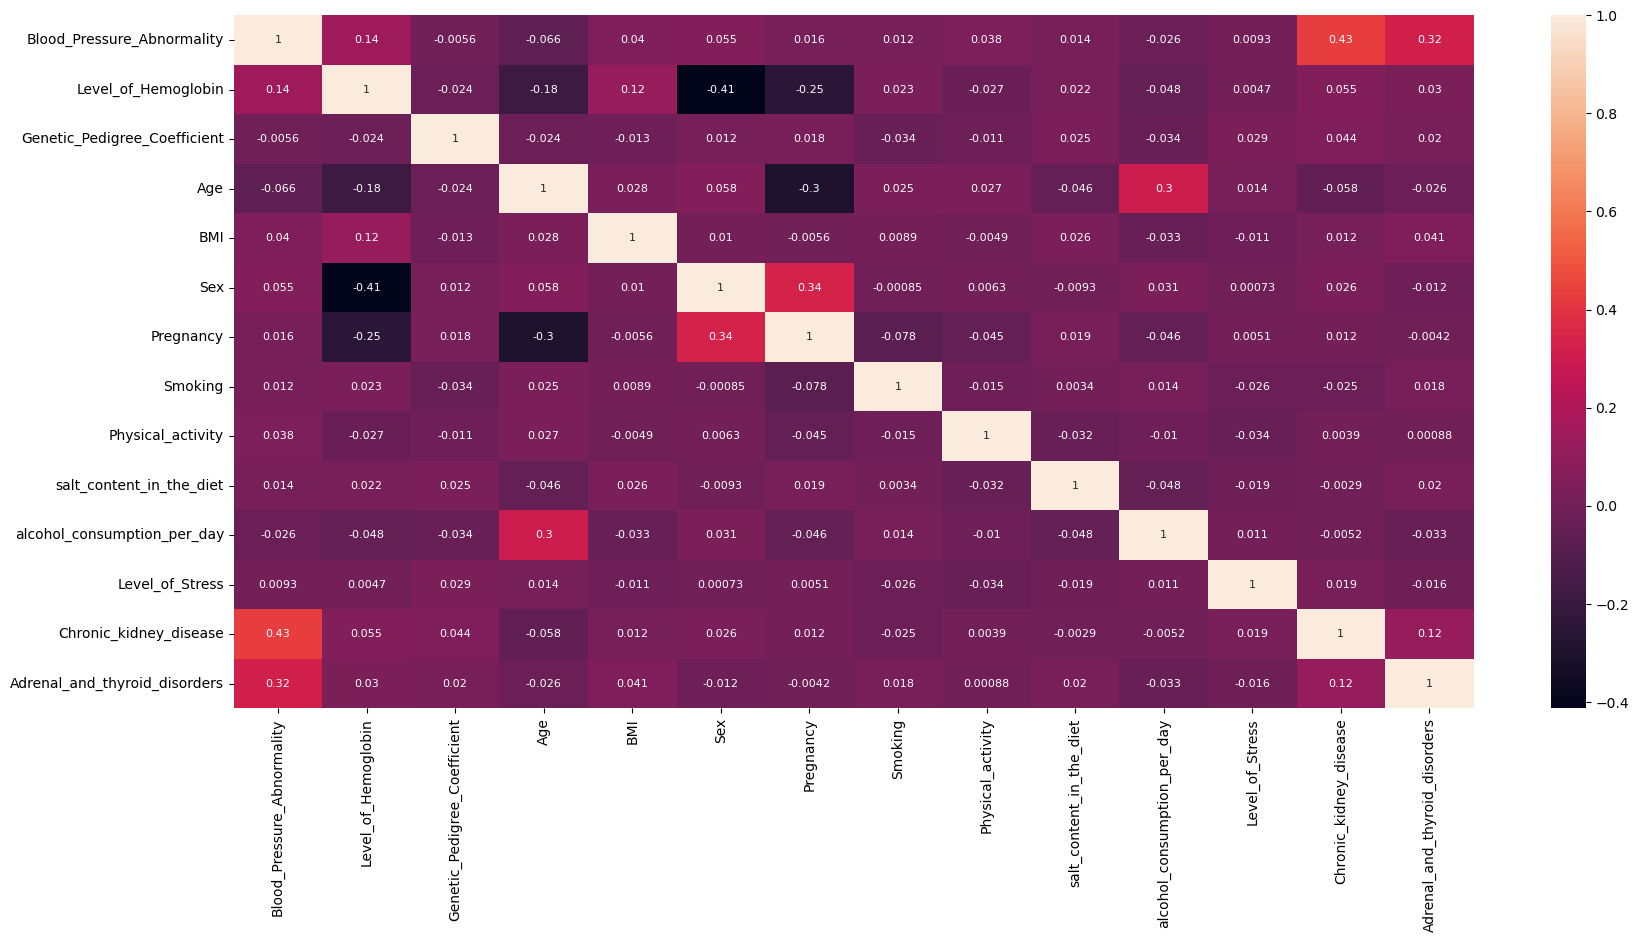

In [21]:
bp_num = bp.select_dtypes(include=['int64','float64' ])
correlation = bp_num.corr()

plt.figure(figsize=(20,9))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})
plt.show()

C:\Users\tupea\AppData\Local\Temp\ipykernel_8828\3487772176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bp['Level_of_Hemoglobin'],color="blue",);


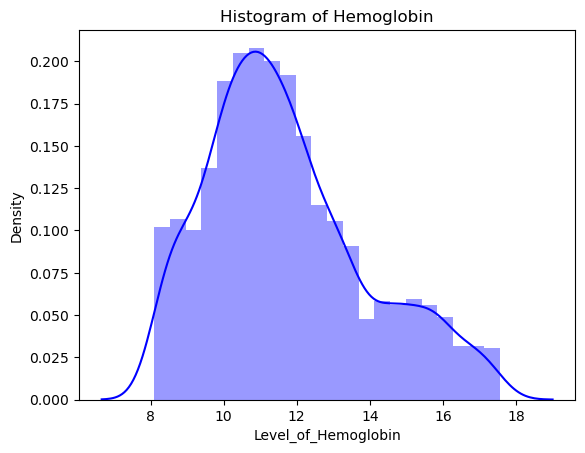

In [22]:
sns.distplot(bp['Level_of_Hemoglobin'],color="blue",);
plt.title("Histogram of Hemoglobin");

In [23]:
bp.groupby("Sex")["Level_of_Hemoglobin"].median()

Sex
0    12.28
1    10.61
Name: Level_of_Hemoglobin, dtype: float64

C:\Users\tupea\AppData\Local\Temp\ipykernel_8828\2276431834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bp['Genetic_Pedigree_Coefficient'],color="red");


Text(0.5, 1.0, 'Histogram of Genetic_Pedigree_Coefficient')

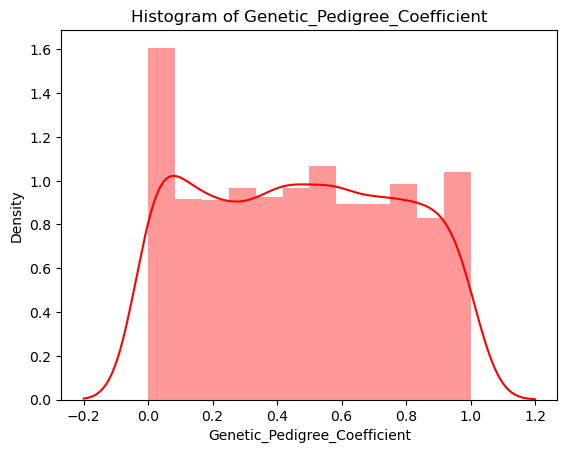

In [24]:
sns.distplot(bp['Genetic_Pedigree_Coefficient'],color="red");
plt.title("Histogram of Genetic_Pedigree_Coefficient")


In [25]:
bp.groupby(["Blood_Pressure_Abnormality"]).describe()

Level_of_Hemoglobin                            \
                                         count       mean       std  min   
Blood_Pressure_Abnormality                                                 
0                                       1013.0  11.409033  1.370716  8.1   
1                                        987.0  12.018967  2.752677  8.1   

                                                        \
                              25%    50%    75%    max   
Blood_Pressure_Abnormality                               
0                           10.41  11.26  12.21  17.20   
1                            9.70  11.42  14.58  17.56   

                           Genetic_Pedigree_Coefficient                      \
                                                  count      mean       std   
Blood_Pressure_Abnormality                                                    
0                                                1013.0  0.473722  0.239989   
1                                                 987.0  0.470344  0.356769   

                                                           Age             \
                            min   25%   50%   75%  max   count       mean   
Blood_Pressure_Abnormality                                                  
0                           0.0  0.30  0.48  0.66  1.0  1013.0  47.678184   
1                           0.0  0.11  0.45  0.84  1.0   987.0  45.409321   

                                                                        BMI  \
                                  std   min   25%   50%   75%   max   count   
Blood_Pressure_Abnormality                                                    
0                           16.942856  18.0  33.0  48.0  63.0  75.0  1013.0   
1                           17.208442  18.0  30.0  45.0  60.0  75.0   987.0   

                                                                          \
                                 mean        std   min   25%   50%   75%   
Blood_Pressure_Abnormality                                                 
0                           29.615005  11.906663  10.0  19.0  30.0  40.0   
1                           30.560284  11.596546  10.0  21.0  30.0  41.0   

                                     Sex                                     \
                             max   count      mean       std  min  25%  50%   
Blood_Pressure_Abnormality                                                    
0                           50.0  1013.0  0.468904  0.499279  0.0  0.0  0.0   
1                           50.0   987.0  0.523810  0.499686  0.0  0.0  1.0   

                                     Pregnancy                                \
                            75%  max     count      mean       std  min  25%   
Blood_Pressure_Abnormality                                                     
0                           1.0  1.0    1013.0  0.094768  0.293039  0.0  0.0   
1                           1.0  1.0     987.0  0.104357  0.305878  0.0  0.0   

                                          Smoking                           \
                            50%  75%  max   count      mean       std  min   
Blood_Pressure_Abnormality                                                   
0                           0.0  0.0  1.0  1013.0  0.503455  0.500235  0.0   
1                           0.0  0.0  1.0   987.0  0.515704  0.500007  0.0   

                                               Physical_activity  \
                            25%  50%  75%  max             count   
Blood_Pressure_Abnormality                                         
0                           0.0  1.0  1.0  1.0            1013.0   
1                           0.0  1.0  1.0  1.0             987.0   

                                                                        \
                                    mean           std    min      25%   
Blood_Pressure_Abnormality                                               
0                           24729.517275  138

In [26]:
pd.crosstab(bp.Blood_Pressure_Abnormality,bp.Chronic_kidney_disease)

Chronic_kidney_disease,0,1
Blood_Pressure_Abnormality,,
0,716,297
1,274,713


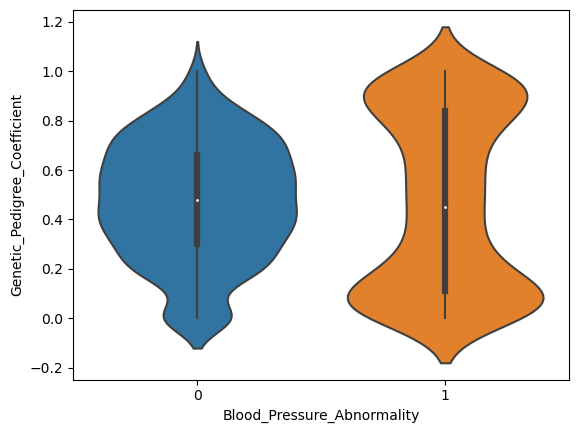

In [27]:
sns.violinplot(x="Blood_Pressure_Abnormality",y="Genetic_Pedigree_Coefficient",data=bp);

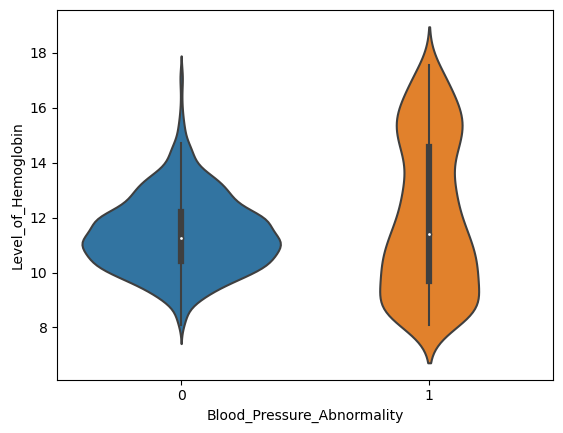

In [28]:
sns.violinplot(x="Blood_Pressure_Abnormality",y="Level_of_Hemoglobin",data=bp);

In [29]:
pd.crosstab(bp.Blood_Pressure_Abnormality,bp.Adrenal_and_thyroid_disorders)

Adrenal_and_thyroid_disorders,0,1
Blood_Pressure_Abnormality,,
0,722,291
1,391,596


In [30]:
pd.crosstab(bp.Blood_Pressure_Abnormality,bp.Level_of_Stress)

Level_of_Stress,1,2,3
Blood_Pressure_Abnormality,,,
0,339,330,344
1,327,313,347


#  Sampling
train_test_split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
bp_train,bp_test=train_test_split(bp,test_size=0.2)


In [33]:
bp_train_x=bp_train.iloc[:,1::]
bp_train_y=bp_train.iloc[:,0]
bp_test_x=bp_test.iloc[:,1::]
bp_test_y=bp_test.iloc[:,0]

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()

In [36]:
log.fit(bp_train_x,bp_train_y)

LogisticRegression()

In [37]:
predictions_log = log.predict(bp_test_x)
predictions_log

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

Confusion Matrix

In [38]:
tab_log = confusion_matrix(predictions_log, bp_test_y)
tab_log

array([[106,  84],
       [103, 107]], dtype=int64)

In [39]:
TP_log= tab_log[0, 0]
TN_log = tab_log[1, 1]
FP_log = tab_log[1,0]
FN_log = tab_log[0, 1]

accuracy_log= ((TP_log + TN_log) / float(TP_log+ TN_log + FP_log+ FN_log))
print('Accuracy  :',accuracy_log)


print('\n')

tpr_log = TP_log / float(FN_log + TP_log)
print('Tpr is :',tpr_log)

print('\n')

fpr_log = FP_log / (FP_log + TN_log)
print('Fpr is :',fpr_log)

print('\n')

Precision_log = TP_log / (TP_log + FP_log)
print('Precision  is :',Precision_log )

print('\n')
specificity_log= TN_log/ (TN_log + FP_log)
print('Specificity  :',specificity_log)

Accuracy  : 0.5325


Tpr is : 0.5578947368421052


Fpr is : 0.49047619047619045


Precision  is : 0.507177033492823


Specificity  : 0.5095238095238095


# classification

## DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt=DecisionTreeClassifier()

In [42]:
dt.fit(bp_train_x,bp_train_y)

DecisionTreeClassifier()

In [43]:
pred_test=dt.predict(bp_test_x)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
tab_dt=confusion_matrix(bp_test_y,pred_test)
tab_dt

array([[179,  30],
       [ 41, 150]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [47]:
accuracy_dt=accuracy_score(bp_test_y,pred_test)
print("accuracy =",accuracy_dt*100)

accuracy = 82.25


In [48]:


feature_importance = pd.DataFrame({'Significant_features':dt.feature_importances_,'Columns_name':bp_train_x.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

,Significant_features,Columns_name
0,0.282363,Level_of_Hemoglobin
1,0.263483,Genetic_Pedigree_Coefficient
11,0.188264,Chronic_kidney_disease
12,0.047978,Adrenal_and_thyroid_disorders
9,0.047572,alcohol_consumption_per_day
8,0.041682,salt_content_in_the_diet
3,0.039889,BMI
2,0.036306,Age
7,0.027987,Physical_activity
4,0.009579,Sex


In [49]:
TP_dt = tab_dt[0, 0]
TN_dt = tab_dt[1, 1]
FP_dt = tab_dt[1,0]
FN_dt = tab_dt[0, 1]

print('accuracy:',accuracy_dt*100)
print('\n')

tpr_dt = TP_dt / float(FN_dt + TP_dt)
print('Tpr is :',tpr_dt)

print('\n')

fpr_dt = FP_dt / (FP_dt + TN_dt)
print('Fpr is :',fpr_dt)

print('\n')

Precision_dt = TP_dt / (TP_dt + FP_dt)
print('Precision  is :',Precision_dt )

print('\n')
specificity_dt= TN_dt/ (TN_dt + FP_dt)
print('Specificity  :',specificity_dt)

accuracy: 82.25


Tpr is : 0.8564593301435407


Fpr is : 0.21465968586387435


Precision  is : 0.8136363636363636


Specificity  : 0.7853403141361257


# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfe = RandomForestClassifier(n_estimators=800)


In [52]:
rfe.fit(bp_train_x,bp_train_y)

RandomForestClassifier(n_estimators=800)

**Prediction for model**


In [53]:
predictions_rf = rfe.predict(bp_test_x)

**Confusion Matrix**


In [54]:
tab_rf = confusion_matrix(predictions_rf, bp_test_y)
tab_rf

array([[179,  18],
       [ 30, 173]], dtype=int64)

In [55]:
TP_rf = tab_rf[0, 0]
TN_rf = tab_rf[1, 1]
FP_rf = tab_rf[1,0]
FN_rf = tab_rf[0, 1]


accuracy_rf = ((TP_rf + TN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf))
print('Accuracy:',accuracy_rf*100)
print('\n')
tpr = TP_rf / float(FN_rf + TP_rf)
print('Sensitivity of Random Forest is :',tpr*100)
print('\n')



fpr_rf = FP_rf/ (FP_rf + TN_rf)
print('Fpr is :',fpr_rf)

print('\n')

Precision_rf= TP_rf / (TP_rf + FP_rf)
print('Precision  is :',Precision_rf )

print('\n')
specificity_rf = TN_rf / (TN_rf + FP_rf)
print('Specificity:',specificity_rf*100)

Accuracy: 88.0


Sensitivity of Random Forest is : 90.86294416243655


Fpr is : 0.1477832512315271


Precision  is : 0.8564593301435407


Specificity: 85.22167487684729


Feature importance

In [56]:
feature_importance = pd.DataFrame({'Significant_features':rfe.feature_importances_,'Columns_name':bp_train_x.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

,Significant_features,Columns_name
1,0.224975,Genetic_Pedigree_Coefficient
0,0.224520,Level_of_Hemoglobin
11,0.130708,Chronic_kidney_disease
12,0.066181,Adrenal_and_thyroid_disorders
8,0.065598,salt_content_in_the_diet
7,0.063559,Physical_activity
2,0.059939,Age
9,0.059129,alcohol_consumption_per_day
3,0.054717,BMI
10,0.016345,Level_of_Stress


# Support Vector Machine

In [57]:
from sklearn.svm import LinearSVC

In [58]:
svm = LinearSVC()

In [59]:
svm.fit(bp_train_x,bp_train_y)

c:\Users\tupea\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

**Prediction for model**

In [60]:
predictions_svm = svm.predict(bp_test_x)


**Confusion Matrix**


In [61]:
tab_svm = confusion_matrix(predictions_svm, bp_test_y)
tab_svm

array([[152, 138],
       [ 57,  53]], dtype=int64)

In [62]:
TP_svm = tab_svm[0, 0]
TN_svm = tab_svm[1, 1]
FP_svm = tab_svm[1,0]
FN_svm = tab_svm[0, 1]

accuracy_svm = ((TP_svm + TN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm))
print(' Accuracy :',accuracy_svm*100)
print('\n')
tpr_svm= TP_svm / float(FN_svm + TP_svm)
print('tpr :',tpr_svm*100)
print('\n')


fpr_svm = FP_svm/ (FP_svm + TN_svm)
print('Fpr is :',fpr_svm)

print('\n')

Precision_svm= TP_svm/ (TP_svm+ FP_svm)
print('Precision  is :',Precision_svm )

print('\n')

#Specificity
specificity_svm = TN_svm / (TN_rf + FP_svm)
print('Specificity  :',specificity_svm*100)

 Accuracy : 51.24999999999999


tpr : 52.41379310344828


Fpr is : 0.5181818181818182


Precision  is : 0.7272727272727273


Specificity  : 23.043478260869566


# **Conclusion:-**

*    After compairing all the parameters the Decision Tree is the best model among other algorithms.


## 9. Pickling the Model file for Deployement

In [63]:
import pickle

In [64]:
pickle.dump(dt,open("model.pkl","wb"))

In [65]:
bp_train_x

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1824,12.08,1.00,28,35,0,0.0,1,10312,45861,210.0,2,1,1
306,10.22,0.64,44,48,0,0.0,1,37168,23480,52.0,3,0,1
1556,13.17,0.27,19,31,0,0.0,0,27368,17525,0.0,1,0,0
1829,16.85,0.48,32,28,0,0.0,0,43703,43104,29.0,2,1,1
971,12.42,0.95,65,25,0,0.0,0,23048,49578,60.0,2,0,0
377,13.19,0.82,60,13,0,0.0,0,9200,42783,146.0,3,0,1
35,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0
1749,10.56,0.08,30,28,0,0.0,0,5904,40975,110.0,3,1,0
697,11.34,0.40,23,34,1,0.0,1,2798,37386,0.0,3,0,0
1443,9.97,0.90,53,35,1,0.0,1,18291,16008,421.0,3,1,1
